In [2]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import random

# seeded random state for reproducibility
np.random.seed(1)

# Generate some dummy data

In [14]:
num_samples = 1000
# Data of class A
A = np.random.normal(0, 0.75, size=(num_samples, 2))
# Data of class B
B = np.random.normal(3, 0.75, size=(num_samples, 2))
# A is labelled as 0 and B is labelled as 1
y = [0 if i < num_samples else 1 for i in range(num_samples*2)]
input_data = np.concatenate([A, B], axis=0)

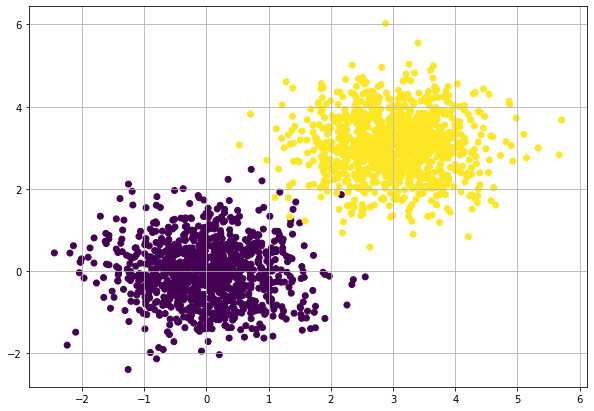

In [15]:
plt.figure(figsize = (10,7))
plt.scatter(input_data[:,0], input_data[:,1], c=y)
plt.grid()
plt.show()

# Define a neural network with PyTorch

In [7]:
class NeuralNetwork(nn.Module):
    def __init__(self, input_dim=2, hidden_dim=8):
        super().__init__()
        
        self.layers = nn.Sequential(
            nn.Linear(input_dim, hidden_dim),
            nn.ReLU(),
            nn.Linear(hidden_dim, 1),
            nn.Sigmoid()
        )
        
    def forward(self, x):
        prediction = self.layers(x)
        return prediction


# Train Loop

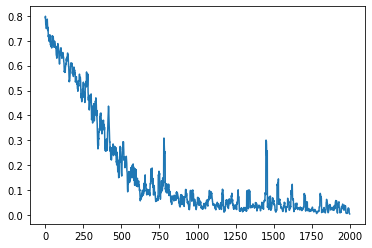

In [72]:
data = list(zip(input_data, y))
random.shuffle(data)
model = NeuralNetwork()
model.train()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)
bce = nn.BCELoss()

loss_list = []
for x, target in data:

    x, target = torch.tensor(x).unsqueeze(0).float(), torch.tensor([target]).float()
    optimizer.zero_grad()
    pred = model(x).squeeze(1)
    loss = bce(pred, target)
    loss.backward()
    optimizer.step()

    loss_list.append(loss.detach().item())

smooth_window_size = 10
smoothed_losses = np.convolve(loss_list, np.ones(smooth_window_size)/smooth_window_size)[smooth_window_size-1:]

plt.plot(smoothed_losses)
plt.show()